In [46]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Loading the datasets
customers = pd.read_csv('/content/drive/MyDrive/Zeotap_Internship/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Zeotap_Internship/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Zeotap_Internship/Transactions.csv')

In [49]:
print("Customers Dataset Info:")
print(customers.info(), "\n")

print("Products Dataset Info:")
print(products.info(), "\n")

print("Transactions Dataset Info:")
print(transactions.info(), "\n")

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #  

In [50]:
# Converting date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [51]:
# Merging datasets
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [52]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


## **Task 1: Exploratory Data Analysis (EDA) and Business Insights**

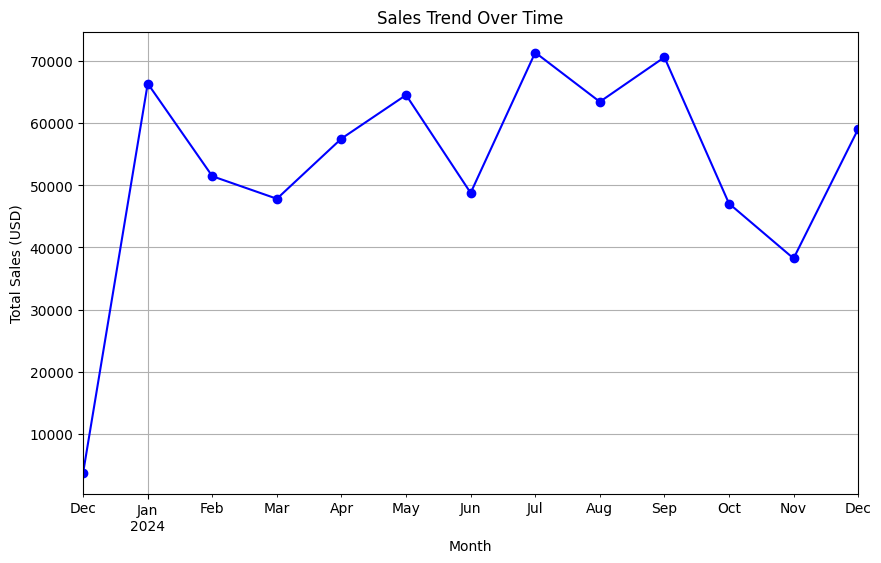

Maximum Sales: 71366.39 in 2024-07
Minimum Sales: 3769.52 in 2023-12


In [53]:
# 1. Sales Trend Over Time
temp=data['TransactionDate'].dt.to_period('M')
sales_trend = data.groupby(temp)['TotalValue'].sum()

plt.figure(figsize=(10, 6))
sales_trend.plot(marker='o', color='blue', title='Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()


max_sales_month = sales_trend.idxmax()
max_sales_value = sales_trend.max()

min_sales_month = sales_trend.idxmin()
min_sales_value = sales_trend.min()

print(f"Maximum Sales: {max_sales_value} in {max_sales_month}")
print(f"Minimum Sales: {min_sales_value} in {min_sales_month}")

Total Number of Products: 66
Maximum Revenue Product: ActiveWear Smartwatch   Revenue: 39096.97
Minimum Revenue Product: ComfortLiving Laptop   Revenue: 647.76


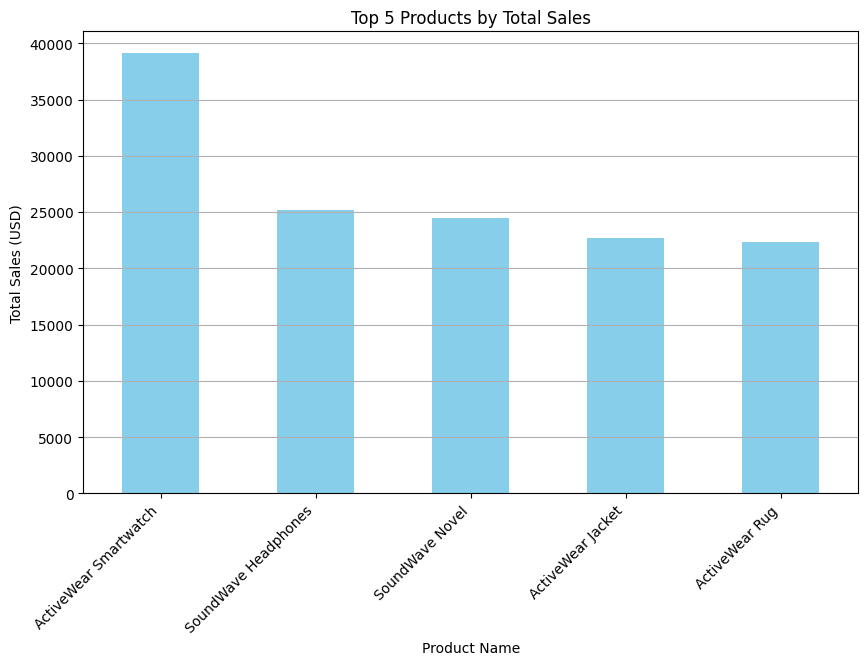

In [54]:
# 2. Top 5 Products by Total Sales
top_products = data.groupby('ProductName')['TotalValue'].sum()

total_products = data['ProductName'].nunique()
print("Total Number of Products:", total_products)

max_revenue_product = top_products.idxmax()
max_revenue = top_products.max()
print("Maximum Revenue Product:", max_revenue_product, "  Revenue:", max_revenue)

min_revenue_product = top_products.idxmin()
min_revenue = top_products.min()
print("Minimum Revenue Product:", min_revenue_product, "  Revenue:", min_revenue)


top_products = top_products.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue', title='Top 5 Products by Total Sales')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

Total Number of Region: 4


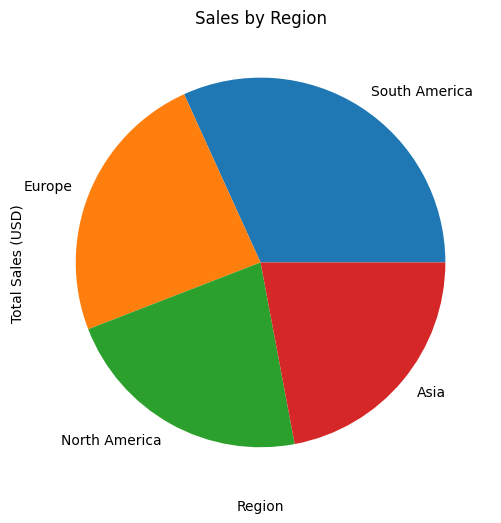

Maximum Sales: 219352.56
Minimum Sales: 152074.97


In [55]:
# 3. Sales by Region
sales_by_region = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

num_sales = data['Region'].nunique()
print("Total Number of Region:", num_sales)

plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='pie',title='Sales by Region')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Region')
plt.grid(axis='y')
plt.show()



max_sales_value = sales_by_region.max()
min_sales_value = sales_by_region.min()

print(f"Maximum Sales: {max_sales_value}")
print(f"Minimum Sales: {min_sales_value}")

Total Number of Region: 4


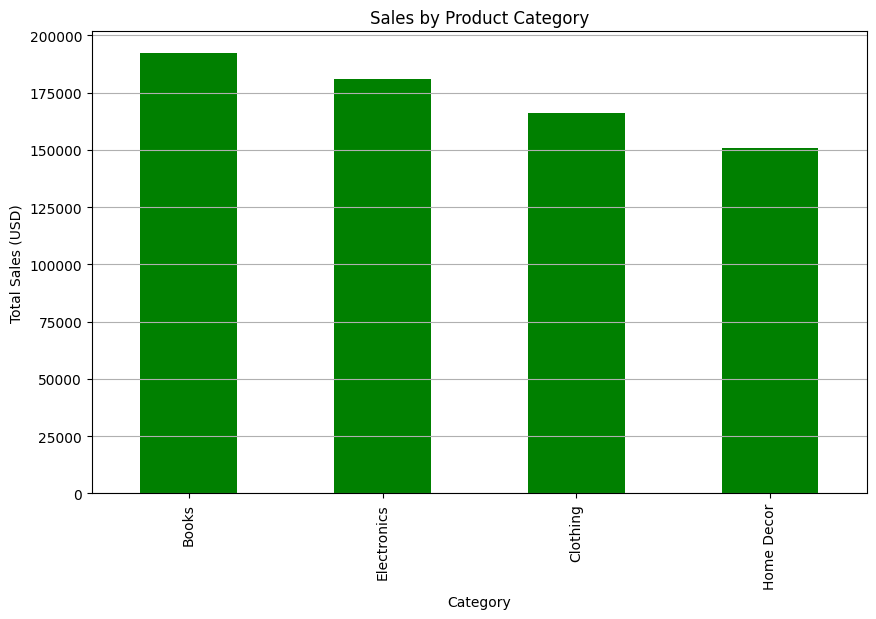

Maximum Sales: 192147.47
Minimum Sales: 150893.93


In [56]:
# 4. Sales by Product Category
category_sales = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

num_category = data['Category'].nunique()
print("Total Number of Region:", num_category)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar', color='green', title='Sales by Product Category')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Category')
plt.grid(axis='y')
plt.show()


max_sales_value = category_sales.max()
min_sales_value = category_sales.min()

print(f"Maximum Sales: {max_sales_value}")
print(f"Minimum Sales: {min_sales_value}")

In [57]:
max(data['Price_y'])

497.76

<ipython-input-58-07e17051f38c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_quantity = data.groupby('PriceRange')['Quantity'].sum().sort_values(ascending=False)


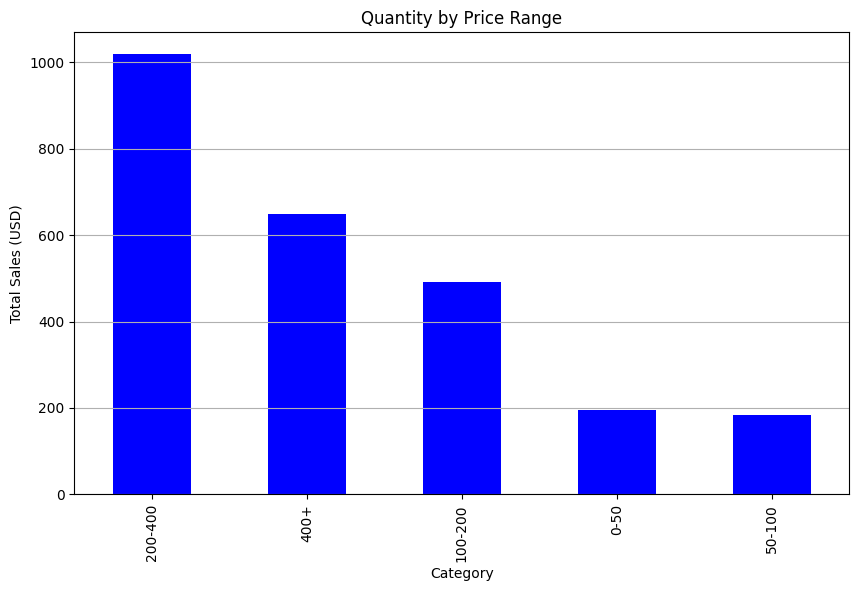

Maximum Quantity: 1019
Minimum Quantity: 183


In [58]:
#5. Quantity by Price Name
import seaborn as sns

price_bins = [0, 50, 100, 200, 400, 500]
data['PriceRange'] = pd.cut(data['Price_y'], bins=price_bins, labels=['0-50', '50-100', '100-200', '200-400', '400+'])

range_quantity = data.groupby('PriceRange')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
range_quantity.plot(kind='bar', color='blue', title='Quantity by Price Range')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Category')
plt.grid(axis='y')
plt.show()


max_quantity = range_quantity.max()
min_quantity = range_quantity.min()

print(f"Maximum Quantity: {max_quantity}")
print(f"Minimum Quantity: {min_quantity}")